# Roosevelt National Forest Data - Type of Trees Prediction

In [77]:
# Import Modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
sns.set()

In [78]:
# Important Macros
FI_THRESHOLD = 0.005

### Load Data

In [79]:
# Use Id column as an Index
forest_data = pd.read_csv('./data/type_of_trees/train.csv',header=0,index_col=0)
forest_data.head(15).T

Id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Elevation,2596,2590,2804,2785,2595,2579,2606,2605,2617,2612,2612,2886,2742,2609,2503
Aspect,51,56,139,155,45,132,45,49,45,59,201,151,134,214,157
Slope,3,2,9,18,2,6,7,4,9,10,4,11,22,7,4
Horizontal_Distance_To_Hydrology,258,212,268,242,153,300,270,234,240,247,180,371,150,150,67
Vertical_Distance_To_Hydrology,0,-6,65,118,-1,-15,5,7,56,11,51,26,69,46,4
Horizontal_Distance_To_Roadways,510,390,3180,3090,391,67,633,573,666,636,735,5253,3215,771,674
Hillshade_9am,221,220,234,238,220,230,222,222,223,228,218,234,248,213,224
Hillshade_Noon,232,235,238,238,234,237,225,230,221,219,243,240,224,247,240
Hillshade_3pm,148,151,135,122,150,140,138,144,133,124,161,136,92,170,151
Horizontal_Distance_To_Fire_Points,6279,6225,6121,6211,6172,6031,6256,6228,6244,6230,6222,4051,6091,6211,5600


**Number of training examples**

In [80]:
forest_data.shape

(15120, 55)

**Headers**

In [81]:
forest_data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

## Feature Selection

In [82]:
# Seperate the predictors and the target
cover_type = forest_data.Cover_Type
forest_data.drop(['Cover_Type'], axis=1, inplace=True)

In [83]:
# Split the data sets. 
fd_train, fd_valid, ct_train, ct_valid = train_test_split(forest_data, cover_type,
                                                          train_size=0.8, test_size=0.2,random_state=0)

In [84]:
# Define list of hyper-parameters for Grid search
NUMBER_OF_ESTIMATORS = [1,2,3,4,5,10,20,25,50,75,100,125,150,175,200,250,300,350,400,450,500]
RANDOM_STATE = [1,2,3,4,5,10,20,25,50]

parameters = {'n_estimators':NUMBER_OF_ESTIMATORS, 'random_state':RANDOM_STATE}


In [85]:
# Define model
# model = RandomForestClassifier()
# gscv = GridSearchCV(model, parameters, cv=5,scoring='accuracy')
# gscv.fit(fd_train, ct_train)

In [86]:
#gscv.best_estimator_

In [87]:
model = RandomForestClassifier(n_estimators=100,random_state=2,oob_score=True,n_jobs=-1)
model.fit(fd_train, ct_train)
ct_valid_pred = model.predict(fd_valid)
model_res = accuracy_score(ct_valid,ct_valid_pred)
model_res

0.8515211640211641

In [88]:
important_features = pd.DataFrame(model.feature_importances_,index=fd_train.columns,columns=['IMPORTANCE'])

In [113]:
important_features.sort_values(by='IMPORTANCE',ascending=False,inplace=True)

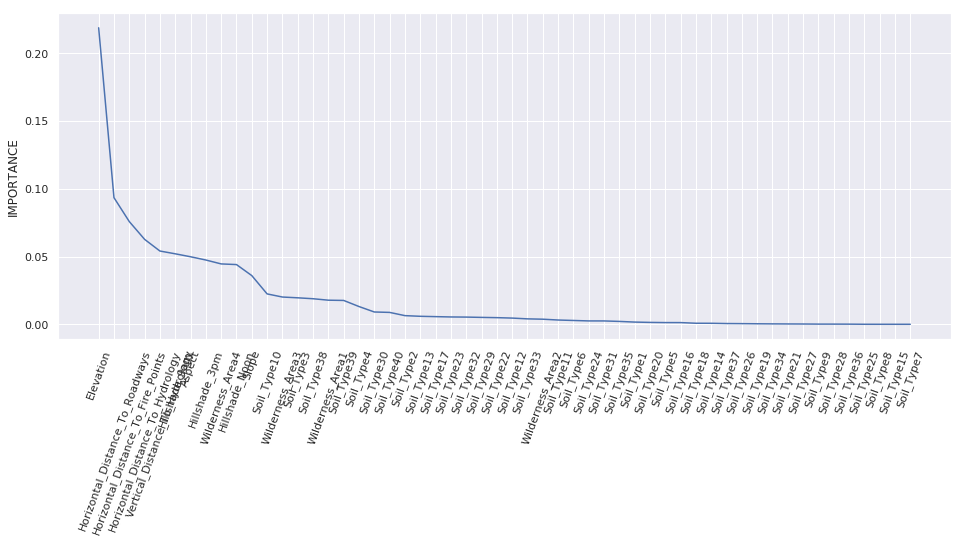

In [92]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x=important_features.index,y='IMPORTANCE',data=important_features,sort=False)
ax.tick_params(axis='x',rotation=70)

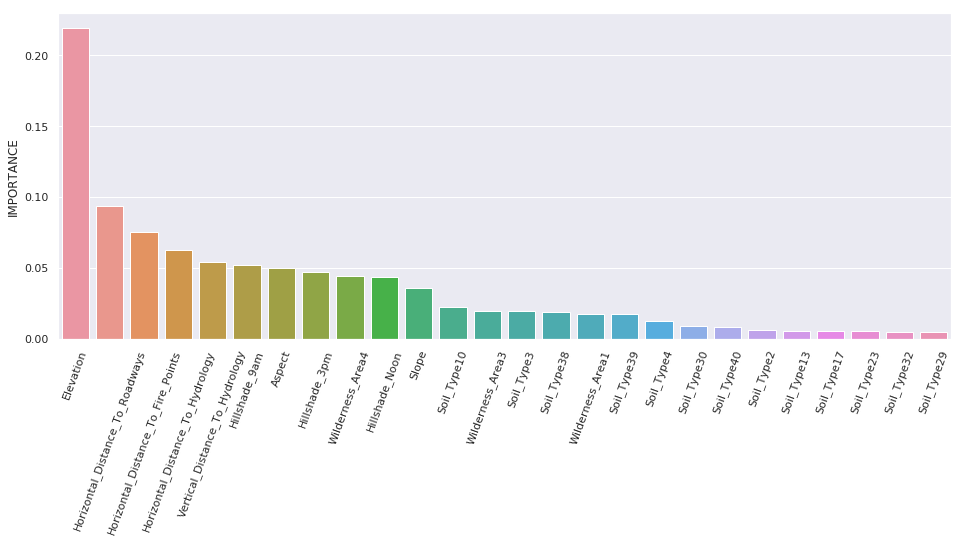

In [93]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x=important_features.loc[important_features['IMPORTANCE'] > FI_THRESHOLD].index,y='IMPORTANCE',data=important_features.loc[important_features['IMPORTANCE'] > FI_THRESHOLD])
ax.tick_params(axis='x',rotation=70)

In [94]:
important_columns = important_features.loc[important_features['IMPORTANCE'] > FI_THRESHOLD].index.values

In [95]:
important_columns

array(['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Aspect',
       'Hillshade_3pm', 'Wilderness_Area4', 'Hillshade_Noon', 'Slope',
       'Soil_Type10', 'Wilderness_Area3', 'Soil_Type3', 'Soil_Type38',
       'Wilderness_Area1', 'Soil_Type39', 'Soil_Type4', 'Soil_Type30',
       'Soil_Type40', 'Soil_Type2', 'Soil_Type13', 'Soil_Type17',
       'Soil_Type23', 'Soil_Type32', 'Soil_Type29'], dtype=object)

In [195]:
soil_type = {}
for row in range(1,forest_data.shape[0]+1):
    data = forest_data.loc[row]
    
    for i in range(1,41):
        column = 'Soil_Type{}'.format(i)
        if data[column] == 1:
            soil_type[row] = i
            break
soil_type = pd.Series(soil_type)
forest_data['Soil_Type'] = soil_type

In [194]:
wilderness_area = {}
for row in range(1,forest_data.shape[0]+1):
    data = forest_data.loc[row]
    
    for i in range(1,5):
        column = 'Wilderness_Area{}'.format(i)
        if data[column] == 1:
            wilderness_area[row] = i
            break
wilderness_area = pd.Series(wilderness_area)
forest_data['Wilderness_Area'] = wilderness_area

In [199]:
features = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', \
           'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',\
            'Horizontal_Distance_To_Fire_Points','Soil_Type','Wilderness_Area']
cons_forest_data = forest_data[features]

In [200]:
# Split the data sets. 
fd_train, fd_valid, ct_train, ct_valid = train_test_split(cons_forest_data, cover_type,
                                                          train_size=0.8, test_size=0.2,random_state=0)

In [201]:
model = RandomForestClassifier(n_estimators=100,random_state=2,oob_score=True,n_jobs=-1)
model.fit(fd_train, ct_train)
ct_valid_pred = model.predict(fd_valid)
model_res = accuracy_score(ct_valid,ct_valid_pred)
model_res

0.8501984126984127

In [202]:
important_features = pd.DataFrame(model.feature_importances_,index=fd_train.columns,columns=['IMPORTANCE'])

In [203]:
important_features.sort_values(by='IMPORTANCE',ascending=False,inplace=True)

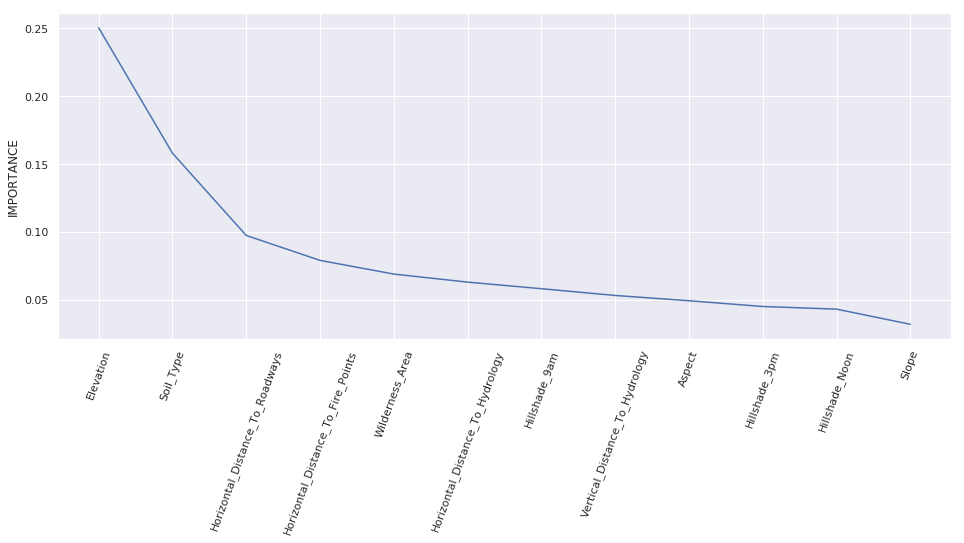

In [204]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x=important_features.index,y='IMPORTANCE',data=important_features,sort=False)
ax.tick_params(axis='x',rotation=70)

In [236]:
FI_THRESHOLD = 0.055

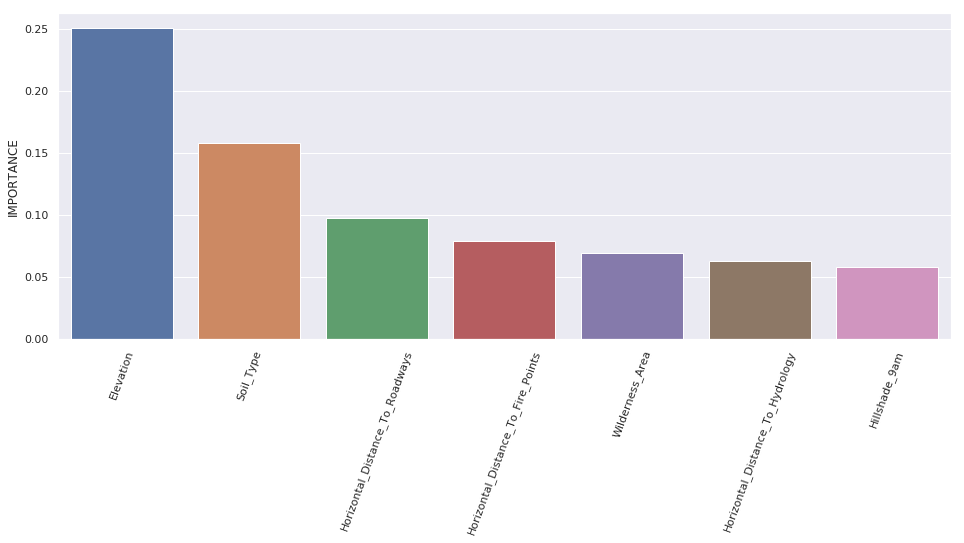

In [237]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x=important_features.loc[important_features['IMPORTANCE'] > FI_THRESHOLD].index,y='IMPORTANCE',data=important_features.loc[important_features['IMPORTANCE'] > FI_THRESHOLD])
ax.tick_params(axis='x',rotation=70)

In [238]:
important_columns = important_features.loc[important_features['IMPORTANCE'] > FI_THRESHOLD].index.values

In [239]:
important_columns

array(['Elevation', 'Soil_Type', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area',
       'Horizontal_Distance_To_Hydrology', 'Hillshade_9am'], dtype=object)

In [240]:
# Split the data sets. 
fd_train, fd_valid, ct_train, ct_valid = train_test_split(cons_forest_data[important_columns], cover_type,
                                                          train_size=0.8, test_size=0.2,random_state=0)

In [241]:
model = RandomForestClassifier(n_estimators=100,random_state=2,oob_score=True,n_jobs=-1)
model.fit(fd_train, ct_train)
ct_valid_pred = model.predict(fd_valid)
model_res = accuracy_score(ct_valid,ct_valid_pred)
model_res

0.857473544973545

## Data Analysis for Identified Features

**Get the descriptive statistics**

In [103]:
numerical_columns=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                   'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                   'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                   'Horizontal_Distance_To_Fire_Points']
forest_data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.0,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.0,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.0,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.0,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.0,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.0,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.0,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.0,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.0,138.0,167.00,248.0
Horizontal_Distance_To_Fire_Points,15120.0,1511.147288,1099.936493,0.0,730.0,1256.0,1988.25,6993.0


In [117]:
def missing_data(df):
    results = {}
    no_of_records = df.shape[0]
    nan_df = df.isnull()
    nan_df_mc = nan_df.any()
    for column_name in nan_df_mc[nan_df_mc].index.values:
        count = nan_df[column_name].value_counts()
        results[column_name] = [count[False],count[True],format((count[False]/no_of_records)*100,'0.2f'),\
                                   format((count[True]/no_of_records)*100,'0.2f')]
        
    return pd.DataFrame(results,index=['VALID_COUNT','MISSING_COUNT','VALID_%','MISSING_%'])

In [118]:
nan_df = missing_data(forest_data)
nan_df.T

,VALID_COUNT,MISSING_COUNT,VALID_%,MISSING_%


**Find the distribution of Elevation, Aspect & Slope features.**

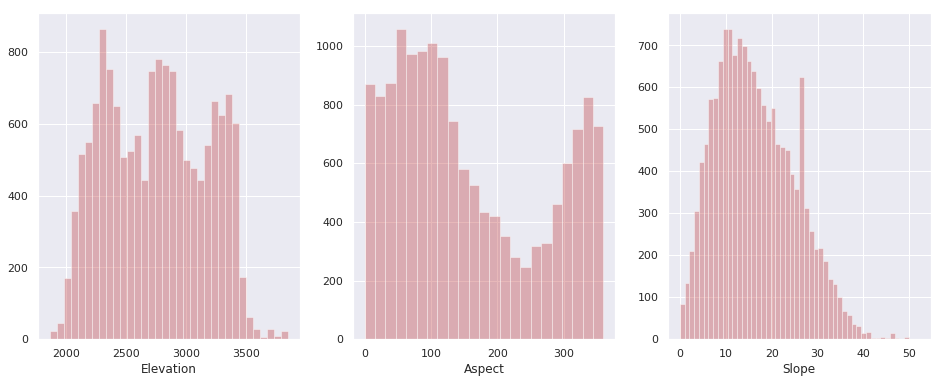

In [104]:
figure, axes = plt.subplots(1,3,figsize=(16,6))
ax1 = sns.distplot(forest_data[['Elevation']],ax=axes[0],color="r",kde=False,axlabel='Elevation')
ax2 = sns.distplot(forest_data[['Aspect']],ax=axes[1],color="r",kde=False,axlabel='Aspect')
ax3 = sns.distplot(forest_data[['Slope']],ax=axes[2],color="r",kde=False,axlabel='Slope')

**Find the distribution of Distance features.**

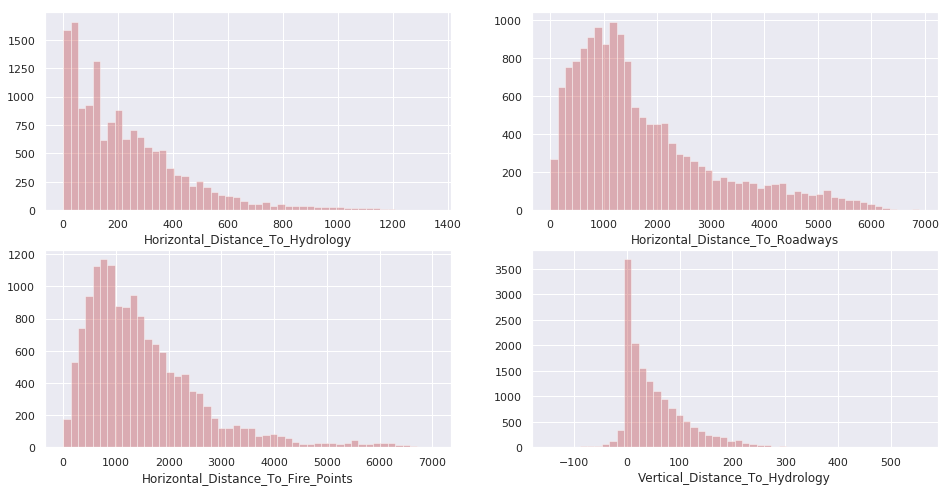

In [105]:
figure, axes = plt.subplots(2,2,figsize=(16,8))
ax1 = sns.distplot(forest_data[['Horizontal_Distance_To_Hydrology']],ax=axes[0,0],\
                   color="r",kde=False,axlabel='Horizontal_Distance_To_Hydrology')
ax2 = sns.distplot(forest_data[['Horizontal_Distance_To_Roadways']],ax=axes[0,1],\
                   color="r",kde=False,axlabel='Horizontal_Distance_To_Roadways')
ax3 = sns.distplot(forest_data[['Horizontal_Distance_To_Fire_Points']],ax=axes[1,0],\
                   color="r",kde=False,axlabel='Horizontal_Distance_To_Fire_Points')
ax4 = sns.distplot(forest_data[['Vertical_Distance_To_Hydrology']],ax=axes[1,1],\
                   color="r",kde=False,axlabel='Vertical_Distance_To_Hydrology')

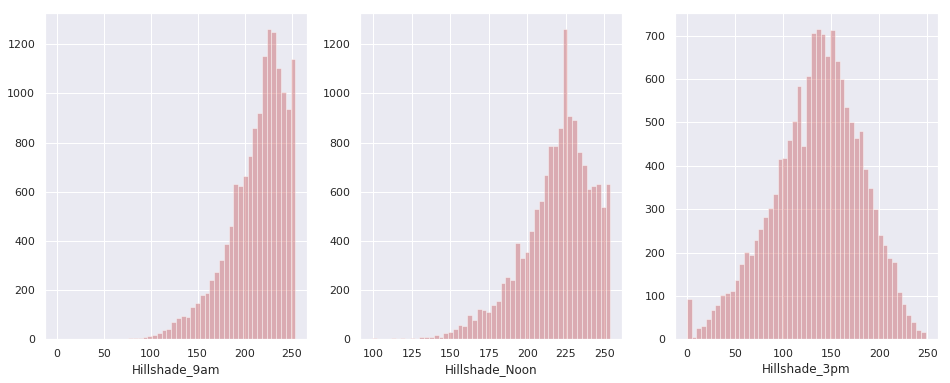

In [106]:
figure, axes = plt.subplots(1,3,figsize=(16,6))
ax1 = sns.distplot(forest_data[['Hillshade_9am']],ax=axes[0],color="r",kde=False,axlabel='Hillshade_9am')
ax2 = sns.distplot(forest_data[['Hillshade_Noon']],ax=axes[1],color="r",kde=False,axlabel='Hillshade_Noon')
ax3 = sns.distplot(forest_data[['Hillshade_3pm']],ax=axes[2],color="r",kde=False,axlabel='Hillshade_3pm')

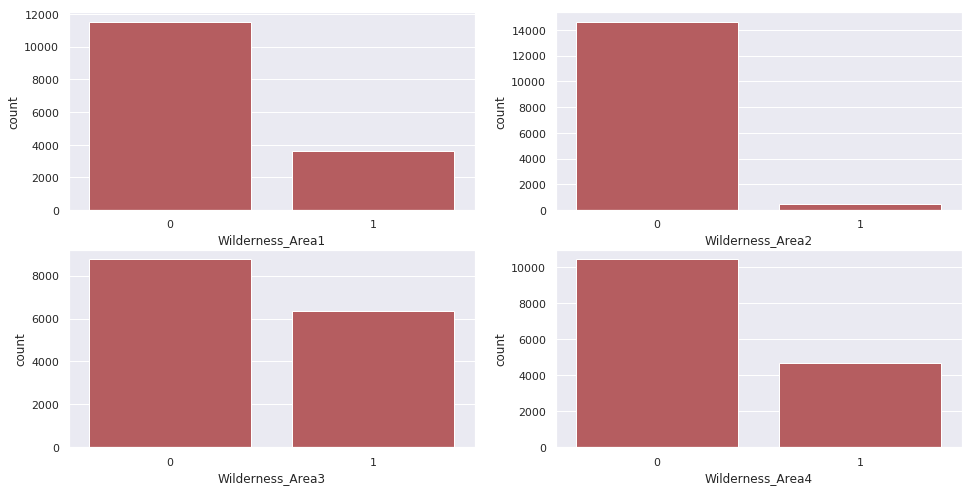

In [108]:
figure, axes = plt.subplots(2,2,figsize=(16,8))
ax1 = sns.countplot(x='Wilderness_Area1',data=forest_data,ax=axes[0,0],color="r")
ax2 = sns.countplot(x='Wilderness_Area2',data=forest_data,ax=axes[0,1],color="r")
ax3 = sns.countplot(x='Wilderness_Area3',data=forest_data,ax=axes[1,0],color="r")
ax4 = sns.countplot(x='Wilderness_Area4',data=forest_data,ax=axes[1,1],color="r")

In [109]:
wilderness_area = pd.DataFrame(index=[0,1])
wilderness_area['Wilderness_Area1'] = forest_data[['Wilderness_Area1']].groupby('Wilderness_Area1').size()
wilderness_area['Wilderness_Area1%'] = (wilderness_area['Wilderness_Area1']/forest_data.shape[0])*100
wilderness_area['Wilderness_Area2'] = forest_data[['Wilderness_Area2']].groupby('Wilderness_Area2').size()
wilderness_area['Wilderness_Area2%'] = (wilderness_area['Wilderness_Area2']/forest_data.shape[0])*100
wilderness_area['Wilderness_Area3'] = forest_data[['Wilderness_Area3']].groupby('Wilderness_Area3').size()
wilderness_area['Wilderness_Area3%'] = (wilderness_area['Wilderness_Area3']/forest_data.shape[0])*100
wilderness_area['Wilderness_Area4'] = forest_data[['Wilderness_Area4']].groupby('Wilderness_Area4').size()
wilderness_area['Wilderness_Area4%'] = (wilderness_area['Wilderness_Area4']/forest_data.shape[0])*100
wilderness_area.T

,0,1
Wilderness_Area1,11523.000000,3597.000000
Wilderness_Area1%,76.210317,23.789683
Wilderness_Area2,14621.000000,499.000000
Wilderness_Area2%,96.699735,3.300265
Wilderness_Area3,8771.000000,6349.000000
Wilderness_Area3%,58.009259,41.990741
Wilderness_Area4,10445.000000,4675.000000
Wilderness_Area4%,69.080688,30.919312


In [1]:
important_columns

NameError: name 'important_columns' is not defined

In [242]:
fi_forest_data = forest_data[important_columns] 

In [243]:
# Split the data sets. 
fd_train, fd_valid, ct_train, ct_valid = train_test_split(fi_forest_data, cover_type,
                                                          train_size=0.8, test_size=0.2,random_state=0)

In [244]:
fi_forest_data[:10].T

Id,1,2,3,4,5,6,7,8,9,10
Elevation,2596,2590,2804,2785,2595,2579,2606,2605,2617,2612
Soil_Type,29,29,12,30,29,29,29,29,29,29
Horizontal_Distance_To_Roadways,510,390,3180,3090,391,67,633,573,666,636
Horizontal_Distance_To_Fire_Points,6279,6225,6121,6211,6172,6031,6256,6228,6244,6230
Wilderness_Area,1,1,1,1,1,1,1,1,1,1
Horizontal_Distance_To_Hydrology,258,212,268,242,153,300,270,234,240,247
Hillshade_9am,221,220,234,238,220,230,222,222,223,228


In [245]:
model = RandomForestClassifier(n_estimators=100,random_state=2,max_features=0.5,
                          n_jobs=-1, oob_score=True)
model.fit(fd_train, ct_train)
ct_valid_pred = model.predict(fd_valid)
model_res = accuracy_score(ct_valid,ct_valid_pred)
model_res

0.857473544973545

In [299]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=50,random_state=2,max_features=0.5,
                              n_jobs=-1, bootstrap=False,oob_score=False)
clf.fit(fd_train, ct_train)
ct_valid_pred = clf.predict(fd_valid)
model_res = accuracy_score(ct_valid,ct_valid_pred)
model_res

0.8713624338624338

In [101]:
def how_do_i_do(column):
    model = RandomForestClassifier(n_estimators=100,random_state=2,max_features=0.5,
                          n_jobs=-1, oob_score=True)
    model.fit(fd_train.drop(column,axis=1), ct_train)
    ct_valid_pred = model.predict(fd_valid.drop(column,axis=1))
    model_res = accuracy_score(ct_valid,ct_valid_pred)
    return model_res

In [102]:
for c in ('Hillshade_3pm', 'Aspect', 'Hillshade_Noon', 'Horizontal_Distance_To_Roadways', 'Elevation', 'Horizontal_Distance_To_Fire_Points'):
    print(c, how_do_i_do(c))

Hillshade_3pm 0.8521825396825397
Aspect 0.8495370370370371
Hillshade_Noon 0.8468915343915344
Horizontal_Distance_To_Roadways 0.8227513227513228
Elevation 0.7962962962962963
Horizontal_Distance_To_Fire_Points 0.8244047619047619
